In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
import pandas as pd

SMALL_SIZE = 15
MEDIUM_SIZE = 18
# Matplotlib settings
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

## 1. Построение теоритической и эмпирической PDF

**Probability Density Function (PDF)** - плотность распределения.

В данном примере выбрано [распределение $\chi^{2}(k)$](https://en.wikipedia.org/wiki/Chi-squared_distribution). 
Тут и далее в работе $k$ - число степеней свободы.

Сгенерируем выборку размера $n$ из распределения $\chi^{2}(5)$ с которой будем дальше работать.

In [180]:
np.random.seed(100)
# Degrees of freadom for chi2 distribution
df = 5 
# Size of dataset
N = 1000

ds = np.random.chisquare(df, size=N)
print('Выборка dS (первые 10 элементов:)\n', ds[:10])

Выборка dS (первые 10 элементов:)
 [0.95368905 5.42246876 7.91181293 6.03027578 3.7990694  5.1282222
 3.11996202 5.74481173 6.63079251 4.03316576]


На рисунке ниже приведены:
1. Эмпирическая гистограмма распределения $\chi^{2}(k)$
2. Теоритическая плотность распределения $\chi^{2}(k)$

c:\users\azakharov\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


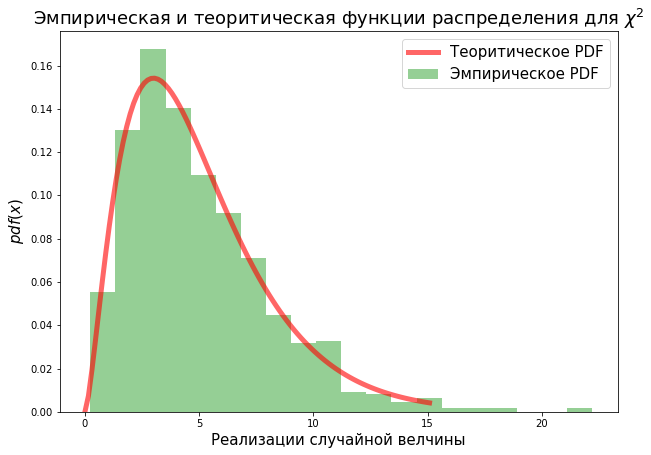

In [181]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel('Реализации случайной велчины')
ax.set_ylabel(r'$pdf(x)$')
ax.set_title(r'Эмпирическая и теоритическая функции распределения для $\chi^{2}$')

# Plot Theorerical Probability Distribution function
x = np.linspace(chi2.ppf(0.00, df),chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='Теоритическое PDF')
ax.hist(ds, 20, color='C2', alpha=0.5, normed=True, label='Эмпирическое PDF')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

## 2. Постоение гистограмм распределения выборочных средних

Ниже Вы можете обнаружить гистограмму распределения выборочных средних для выборок размером $n=[5, 10, 50]$ сгенерированных из ранее созданного датасета $dS$.

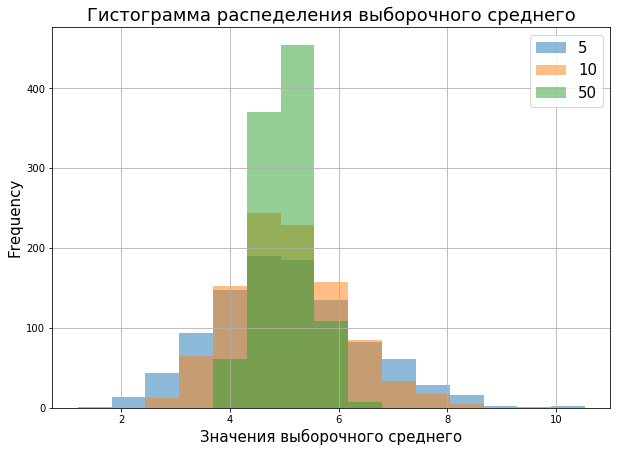

In [182]:
DS_SIZES = np.array([5, 10 , 50], dtype=int)
DS_N = 1000

ds_mean = { size : [] for size in DS_SIZES}

# Generate datasets with mean value distribution
for cur_size in DS_SIZES:
    for i in range(DS_N):
        ds_mean[cur_size].append(np.random.choice(ds, cur_size).mean())

data=pd.DataFrame(ds_mean)

# Plot histograms
ax = data.plot.hist(alpha=0.5, bins=15, figsize=(10, 7))
ax.set_title('Гистограмма распеделения выборочного среднего')
ax.set_xlabel('Значения выборочного среднего')
ax.grid(True)
plt.show()

## 3. Оценки распределения выборочного среднего $\overline{x}$

Для распределения $\chi^{2}(k)$ описательные статистики равны соответственно:
1. Математическое ожидание $E\chi^{2}(k) = k$.
2. Дисперсия $D\chi^{2}(k)=2k$,

где $k$ - чило степеней свободы.

Тогда выборочное среднее $\overline{x}=\frac{1}{n}\sum_{i}x_{i}$ имеет нормальное распределение с математическим ожиданием:
$$
    E\overline{x}=E(\frac{1}{n}\sum_{i}x_{i})=\frac{1}{n}E(\sum_{i}x_{i})=\frac{1}{n}\sum_{i}E(x_{i})=[E\chi^{2}(k)=k] = \frac{1}{n}\sum_{i}k=\frac{nk}{n}=k,
$$
и дисперсией:
$$
    D\overline{x}=D(\frac{1}{n}\sum_{i}x_{i})=\frac{1}{n^{2}}D(\sum_{i}x_{i})=\frac{1}{n^{2}}\sum_{i}D(x_{i})=[D\chi^{2}(k)=2k] = \frac{1}{n^{2}}\sum_{i}2k=\frac{2nk}{n^{2}}=\frac{2k}{n}.
$$

Ранее мы сгенерировали выборку $dS~\chi^{2}(5)$ (число степеней свободы - 5).

In [183]:
print('Выборка dS (первые 10 элементов):\n {0}'.format(ds[:10]))

Выборка dS (первые 10 элементов):
 [0.95368905 5.42246876 7.91181293 6.03027578 3.7990694  5.1282222
 3.11996202 5.74481173 6.63079251 4.03316576]


### 3.1 Оценка распределения $\overline{x}$ при n=5

Тогда для выборки размером $n=5$ выборочное среднее имеет распределение $\overline{x} \;$\; ~$N(k, \frac{2k}{n})=[k=5,n=5]=N(5, 2)$.

Проверим вид распределения выборочного среднего на выборках размера $n=5$.

In [184]:
print('Мат. ожидание =', round(data.loc[:, 5].mean(), 2))
print('Дисперсия =', round(data.loc[:, 5].std()**2, 2))

Мат. ожидание = 5.05
Дисперсия = 1.82


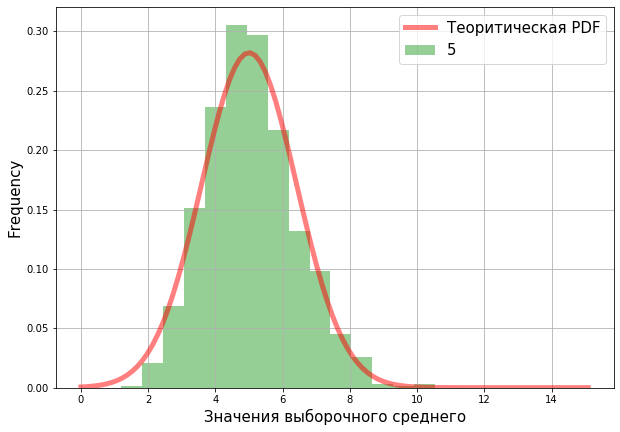

In [185]:
ax = data.loc[:, [5]].plot.hist(color='C2', alpha=0.5, figsize=(10, 7), bins=15, normed=True)
ax.set_xlabel('Значения выборочного среднего')
norm_rv = norm(5, np.sqrt(2))
plt.plot(x, norm_rv.pdf(x), 'r-', lw=5, label='Теоритическая PDF', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.grid(True)
plt.show()

### 3. 2 Оценка распределения $\overline{x}$ при n=10

Тогда для выборки размером $n=10$ выборочное среднее имеет распределение $\overline{x} \;$\; ~$N(k, \frac{2k}{n})=[k=5,n=10]=N(5, 1)$.

Проверим вид распределения выборочного среднего на выборках размера $n=10$.

In [186]:
print('Мат. ожидание =', round(data.loc[:, 10].mean(), 2))
print('Дисперсия =', round(data.loc[:, 10].std()**2, 2))

Мат. ожидание = 5.08
Дисперсия = 1.05


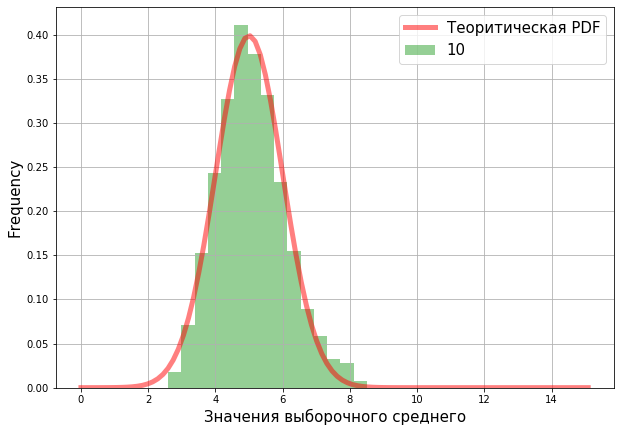

In [187]:
ax = data.loc[:, [10]].plot.hist(color='C2', alpha=0.5, figsize=(10, 7), bins=15, normed=True)
ax.set_xlabel('Значения выборочного среднего')
norm_rv = norm(5, 1)
plt.plot(x, norm_rv.pdf(x), 'r-', lw=5, label='Теоритическая PDF', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.grid(True)
plt.show()

### 3.3 Оценка распределения $\overline{x}$ при n=50

Тогда для выборки размером $n=50$ выборочное среднее имеет распределение $\overline{x} \;$\; ~$N(k, \frac{2k}{n})=[k=5,n=50]=N(5, 0.2)$.

Проверим вид распределения выборочного среднего на выборках размера $n=50$.

In [188]:
print('Мат. ожидание =', round(data.loc[:, 50].mean(), 2))
print('Дисперсия =', round(data.loc[:, 50].std()**2, 2))

Мат. ожидание = 5.0
Дисперсия = 0.2


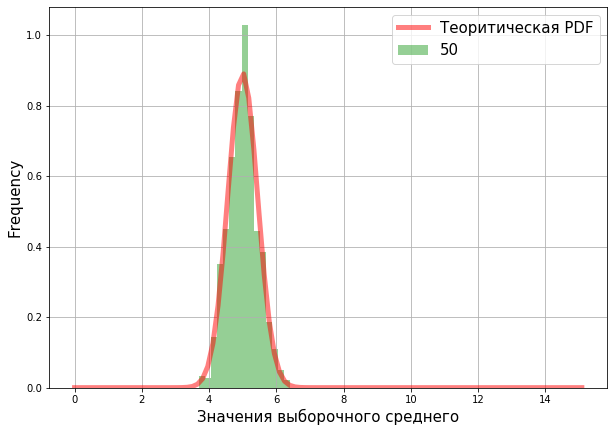

In [189]:
ax = data.loc[:, [50]].plot.hist(color='C2', alpha=0.5, figsize=(10, 7), bins=15, normed=True)
ax.set_xlabel('Значения выборочного среднего')
norm_rv = norm(5, np.sqrt(0.2))
plt.plot(x, norm_rv.pdf(x), 'r-', lw=5, label='Теоритическая PDF', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.grid(True)
plt.show()

## 4. Выводы

1. По представленным выше графикам видно что распределение выборочного среднего $\overline{x}$ выборки из распределения $\chi^{2}(k)$ действительно описывается нормальным распределением вида ~$N(k, \frac{2k}{n})$, где $k$ - число степеней свободы распределения $\chi^{2}(k)$.
2. При увеличении размера выборки, используемого для оценки выборочного среднего $n=[5, 10, 50]$ видно (по графикам), что точность апроксимации распределения выборочного среднего увеличивается с ростом $n$.

In [196]:
from scipy.stats import poisson
import math

def poisson_probability(actual, mean):
    # naive:   math.exp(-mean) * mean**actual / factorial(actual)

    # iterative, to keep the components from getting too large or small:
    p = math.exp(-mean)
    for i in range(actual):
        p *= mean
        p /= i+1
    return p

P = 0.
for i in range(5):
    print(i)
    P += poisson_probability(i, 3)
print(1. - P)


0
1
2
3
4
0.18473675547622792
